# K - means (klasterovanje)

K - means tj. K -sredina, K je parametar koji odredjuje broj klastera
Lupimo k centroida (nesto kao predstavnici klastera). Odaberemo pozicije tih centroida, pa po blizini grupisemo po klasterima. U sledecoj iteraciji sada imamo i centroide i klastere, ali centroidi nisu bas u centru, radimo prilagodjavane pozicije centroida (na osnovu elementara unutar klastera), nakon toga updateujemo i kom klasteru pripada koja instanca itd... Ovo se ponavlja dok vise nemamo promena.

Za neko K (npr 2) mi mozemo dobiti neke klastere, ali ti klasteri ne moraju biti dobri. Kao neko merilo uspesnosti uvodimo **SSE - Sum of Squared Errors**.

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('dogs.csv')
df.head()

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8


In [6]:
df.describe()

,height,weight
count,11.000000,11.000000
mean,19.545455,59.818182
std,7.659812,47.023012
min,6.000000,7.000000
25%,17.000000,27.500000
50%,20.000000,50.000000
75%,24.000000,74.000000
max,32.000000,160.000000


In [8]:
feature_names = df.columns[1:]
print(feature_names)
X = df[feature_names]
X

Index(['height', 'weight'], dtype='object')


,height,weight
0,20,45
1,16,20
2,18,35
3,27,120
4,8,8
5,25,78
6,23,70
7,32,160
8,21,50
9,19,65


Posto koristimo euklidsko rastojanje moramo da normalizujemo podatke

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [13]:
X = pd.DataFrame(scaler.fit_transform(X))
X

,0,1
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=2)

In [16]:
kmeans.fit(X)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [17]:
print(kmeans.cluster_centers_)
print(kmeans.inertia_)
print(kmeans.labels_)

[[0.23076923 0.06862745]
 [0.68681319 0.50326797]]
0.8022566079970036
[1 0 0 1 0 1 1 1 1 1 0]


In [18]:
X.shape

(11, 2)

In [19]:
import matplotlib.pyplot as plt

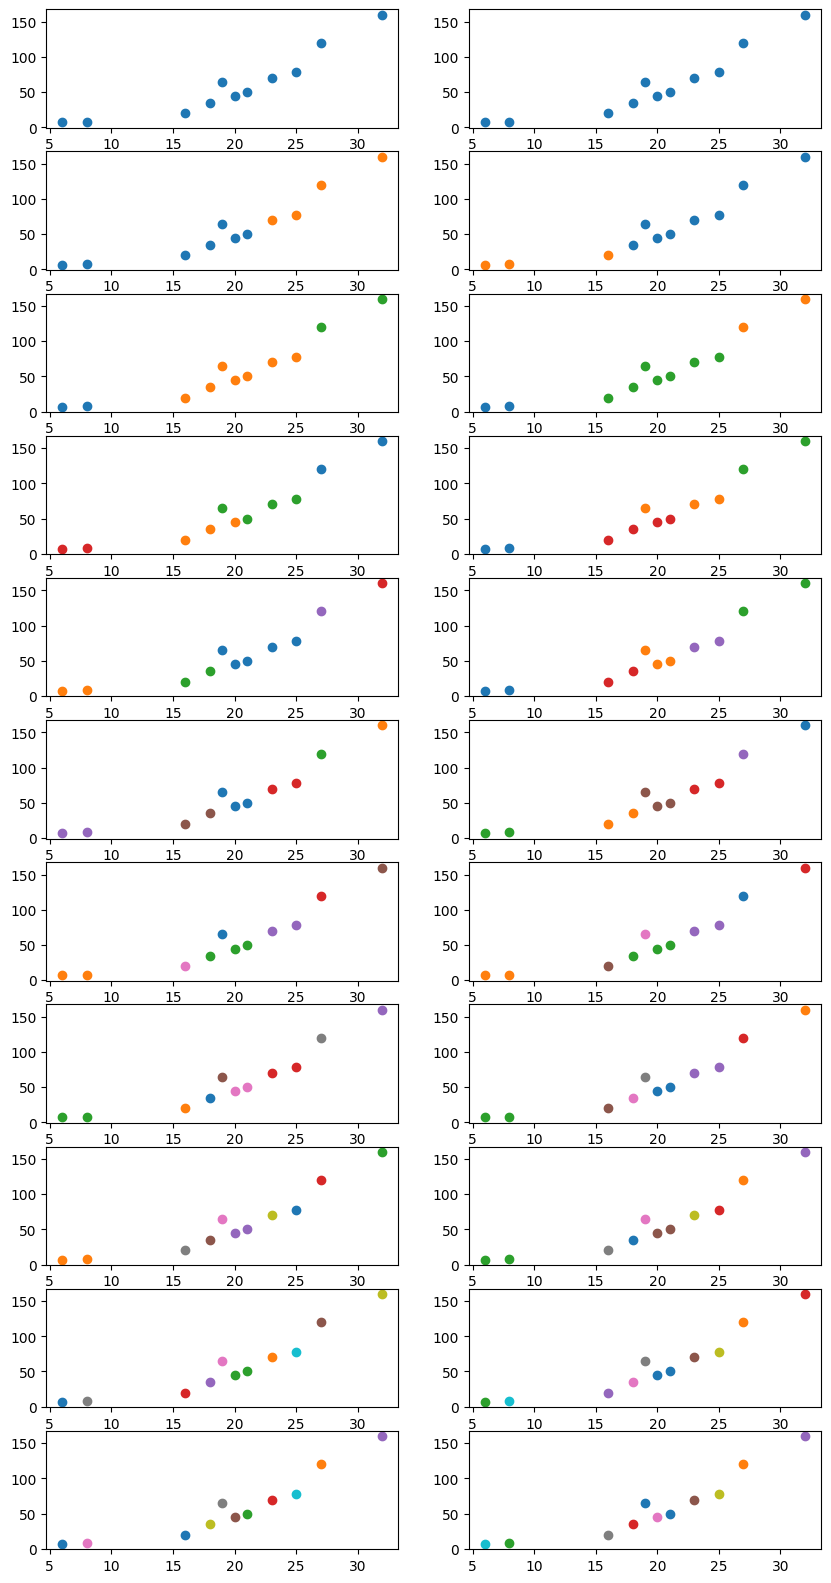

In [24]:
ks = range(1, X.shape[0] + 1)
inits = ['random', 'k-means++']
fig = plt.figure(figsize=(10,20))
idx = 1
inertias = []
for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters=k, init=init)
        kmeans.fit(X)

        if init == 'k-means++':
            inertias.append(kmeans.inertia_)
        
        fig.add_subplot(len(ks), len(inits), idx)
        idx += 1

        for cluster_label in range(k):
            cluster = df[kmeans.labels_ == cluster_label]
            plt.scatter(cluster['height'], cluster['weight'])

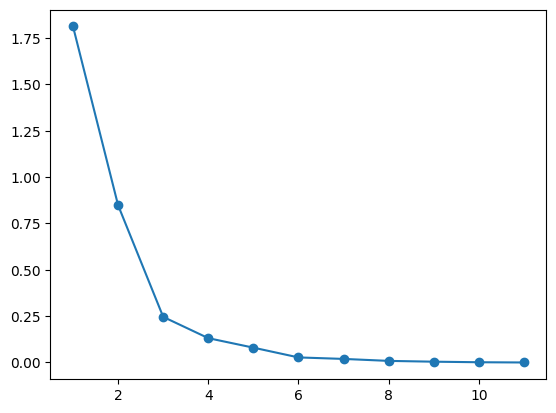

In [26]:
plt.plot(ks, inertias, marker = 'o')